In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')

#This is our base dataset for adoni market
market = pd.read_csv("adoni_market.xls")

In [144]:
market.columns

Index(['State', 'District', 'Market', 'Commodity', 'Variety', 'Arrival_Date',
       'Min Price', 'Max Price', 'Modal Price'],
      dtype='object')

In [145]:
#Only kapas variety dataset
kapas = market.loc[market['Variety'] == 'Kapas (Adoni)']

In [146]:
kapas = kapas[['Arrival_Date','Min Price','Max Price','Modal Price']]

#Dataset after 2500 rows is continuous i.e very less dates are missing
#DATA FROM YEAR 2011
kapas = kapas.loc[2500: , :]
kapas.reset_index(drop=True)

,Arrival_Date,Min Price,Max Price,Modal Price
0,01/01/2011,3611,4629,4400
1,03/01/2011,3569,4596,4350
2,04/01/2011,3569,4596,4350
3,05/01/2011,3751,4729,4450
4,07/01/2011,3800,4749,4450
5,10/01/2011,4181,4869,4550
6,12/01/2011,4009,5029,4700
7,13/01/2011,4009,5029,4700
8,14/01/2011,4009,5029,4700
9,15/01/2011,4009,5029,4700


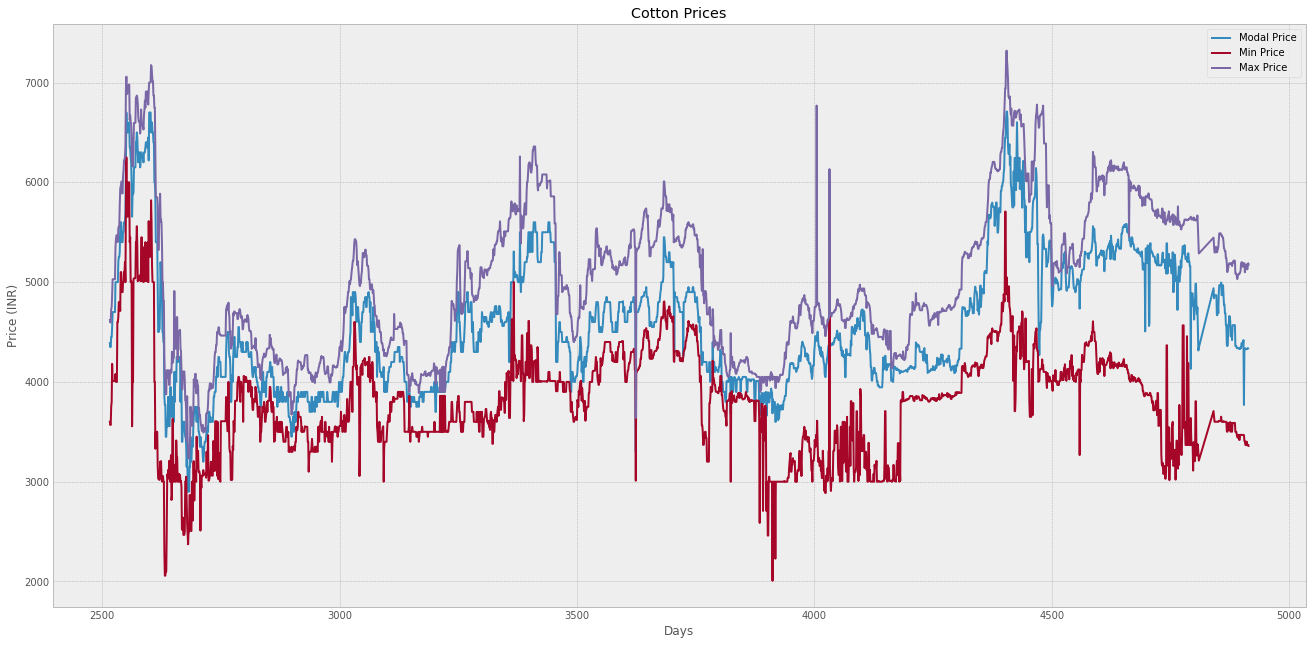

In [175]:
plt.figure(figsize=(20,10))
plt.plot(kapas["Modal Price"])
plt.plot(kapas["Min Price"])
plt.plot(kapas["Max Price"])
plt.title('Cotton Prices')
plt.ylabel('Price (INR)')
plt.xlabel('Days')
plt.legend(['Modal Price', 'Min Price', 'Max Price'], loc='upper right')
plt.show()

In [148]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [28]:
# #Splitting and Normalizing the data

# train_cols = ["Min Price","Max Price","Modal Price"]
# kapas_train, kapas_test = train_test_split(kapas, train_size=0.8, test_size=0.2, shuffle=False)
# print("Train and Test size: ", len(kapas_train), len(kapas_test))
# # scale the feature MinMax, build array
# x = kapas_train.loc[:,train_cols].values
# min_max_scaler = MinMaxScaler()
# x_train = min_max_scaler.fit_transform(x)
# x_test = min_max_scaler.transform(kapas_test.loc[:,train_cols])

In [113]:
kapas_modal = kapas.iloc[:, 3:].values
training_set, test_set = train_test_split(kapas_modal, train_size=0.8, test_size=0.2, shuffle=False)

In [114]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

C:\Users\kaush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [115]:
X_train = []
y_train = []
for i in range(60, 1892):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [116]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [125]:

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1832/1832 [==============================] - 7s 4ms/step - loss: 0.0215
Epoch 2/100
1832/1832 [==============================] - 5s 3ms/step - loss: 0.0067
Epoch 3/100
1832/1832 [==============================] - 5s 3ms/step - loss: 0.0064
Epoch 4/100
1832/1832 [==============================] - 4s 2ms/step - loss: 0.0056
Epoch 5/100
1832/1832 [==============================] - 5s 3ms/step - loss: 0.0053
Epoch 6/100
1832/1832 [==============================] - 5s 3ms/step - loss: 0.0047
Epoch 7/100
1832/1832 [==============================] - 5s 3ms/step - loss: 0.0044
Epoch 8/100
1832/1832 [==============================] - 5s 3ms/step - loss: 0.0040
Epoch 9/100
1832/1832 [==============================] - 5s 3ms/step - loss: 0.0038
Epoch 10/100
1832/1832 [==============================] - 5s 3ms/step - loss: 0.0040
Epoch 11/100
1832/1832 [==============================] - 5s 3ms/step - loss: 0.0040
Epoch 12/100
1832/1832 [==============================] - 5s 3ms/step - lo

Epoch 97/100
1832/1832 [==============================] - 5s 3ms/step - loss: 0.0013
Epoch 98/100
1832/1832 [==============================] - 5s 3ms/step - loss: 0.0014
Epoch 99/100
1832/1832 [==============================] - 5s 3ms/step - loss: 0.0014
Epoch 100/100
1832/1832 [==============================] - 5s 3ms/step - loss: 0.0014


In [126]:
inputs = kapas_modal[len(kapas_modal) - len(test_set) - 60 : ]
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 534):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_cotton_price = regressor.predict(X_test)
predicted_cotton_price = sc.inverse_transform(predicted_cotton_price)

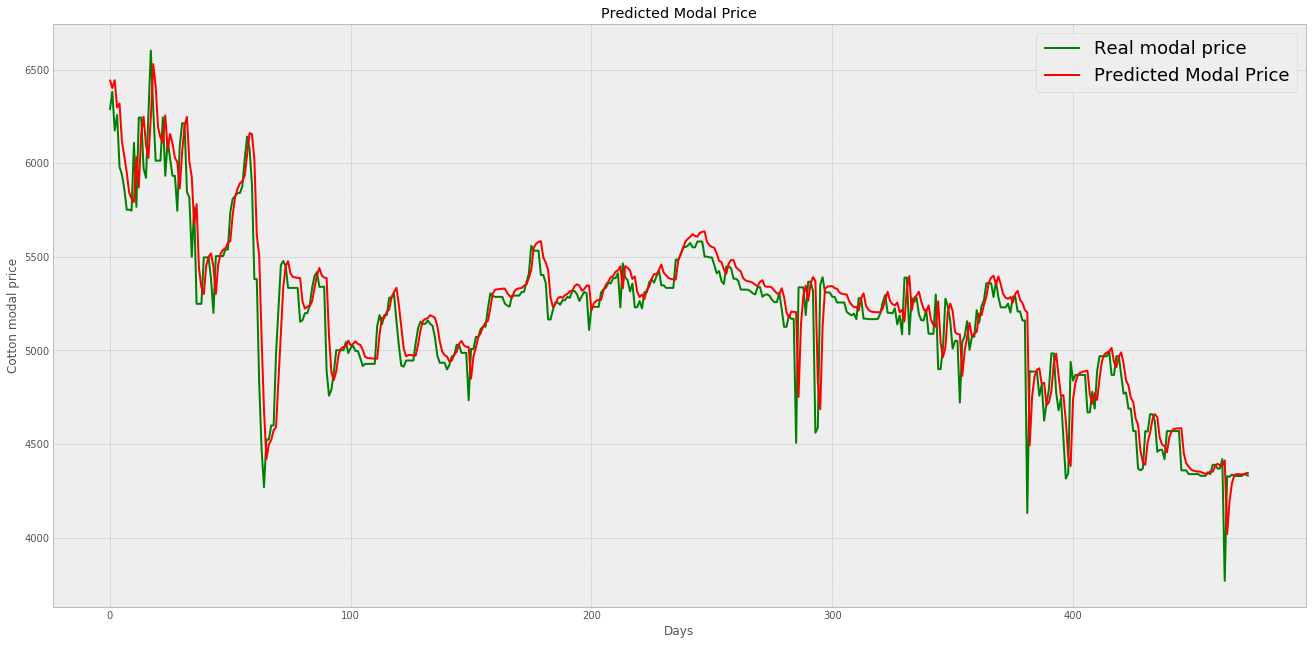

In [173]:
#Plotting the data
plt.figure(figsize=(20,10))
plt.plot(test_set, color= 'green', label = 'Real modal price')
plt.plot(predicted_cotton_price, color = 'red', label = 'Predicted Modal Price')
plt.title('Predicted Modal Price')
plt.xlabel('Days')
plt.ylabel('Cotton modal price')
plt.legend(fontsize=18)
plt.show()

C:\Users\kaush\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


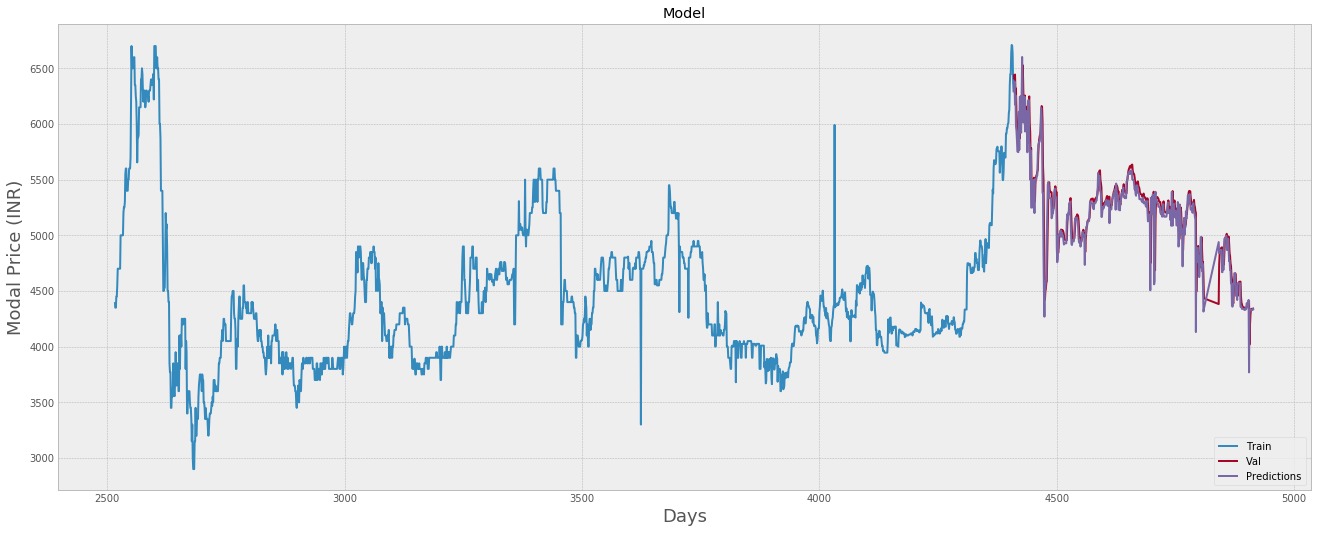

In [171]:

data = kapas.filter(['Modal Price'])
data.reset_index(drop=True)
train = data[:1892]
valid = data[1892:]
valid['Predictions'] = predicted_cotton_price
plt.figure(figsize=(20,8))
plt.title('Model')
plt.xlabel('Days', fontsize=18)
plt.ylabel('Modal Price (INR)', fontsize=18)
plt.plot(train)
plt.plot(valid[['Predictions','Modal Price']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [134]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [157]:
rmse = sqrt(mean_squared_error(test_set, predicted_stock_price))
rmse

168.3969306523937